# Regression Tree Clustering

Clustering based on regression trees and studying the pricing distributions of each cluster

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [5]:
traindata = pd.read_csv('Iowa Housing Dataset/train.csv')
testdata = pd.read_csv('Iowa Housing Dataset/test.csv')

In [6]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [8]:
traindata.set_index('Id', inplace=True)
testdata.set_index('Id', inplace=True)

## Eliminating missing values

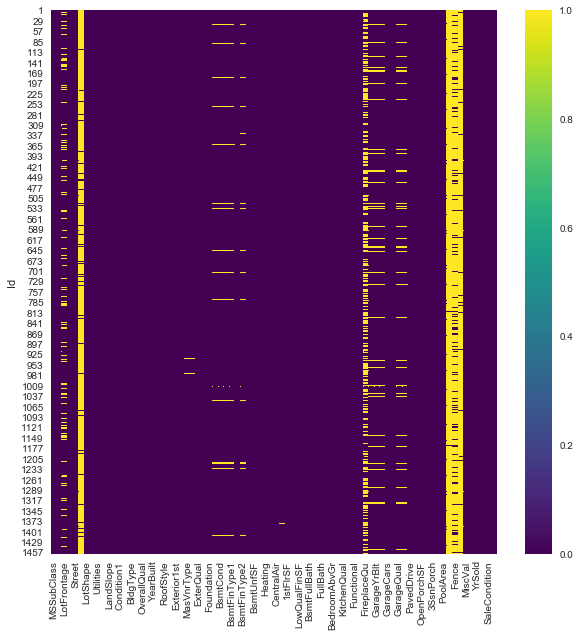

In [9]:
nafig, naax = plt.subplots(figsize=(10,10))
naax = sns.heatmap(traindata.isnull(), cmap='viridis')

In [10]:
traindata['PoolQC'].describe()

count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object

In [11]:
traindata['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [12]:
traindata['PoolQC'].isnull().value_counts()

True     1453
False       7
Name: PoolQC, dtype: int64

In [13]:
nas = traindata.isnull().sum().sort_values(ascending=False)
percentna = (traindata.isnull().sum()/traindata.isnull().count()).sort_values(ascending=False)
missingdata = pd.DataFrame({'Total NA':nas,'Percent NA':percentna})
missingdata

,Percent NA,Total NA
PoolQC,0.995205,1453
MiscFeature,0.963014,1406
Alley,0.937671,1369
Fence,0.807534,1179
FireplaceQu,0.472603,690
LotFrontage,0.177397,259
GarageType,0.055479,81
GarageCond,0.055479,81
GarageFinish,0.055479,81
GarageQual,0.055479,81


In [14]:
cleantrain = traindata.drop(missingdata[missingdata['Total NA']>1].index, axis = 1)
cleantrain = cleantrain.drop(cleantrain.loc[traindata['Electrical'].isnull()].index)

cleantrain.isnull().sum().max()

0

In [15]:
cleantrain.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.881426,10517.363948,6.100069,5.575737,1971.244003,1984.850583,443.943797,46.581220,567.366004,1057.891021,...,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,42.310746,9984.666267,1.383171,1.113079,30.199555,20.644343,456.106417,161.369977,441.992392,438.500975,...,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,796.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,50.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,384.000000,0.000000,479.000000,992.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,712.500000,0.000000,808.000000,1298.500000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Exploratory data analysis

In [16]:
cleantrain['SalePrice'].describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

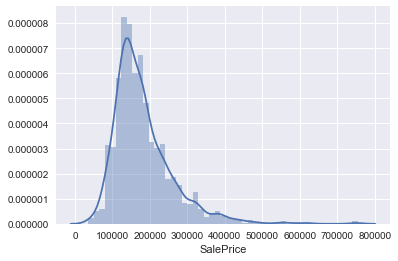

In [17]:
sns.distplot(cleantrain['SalePrice'])

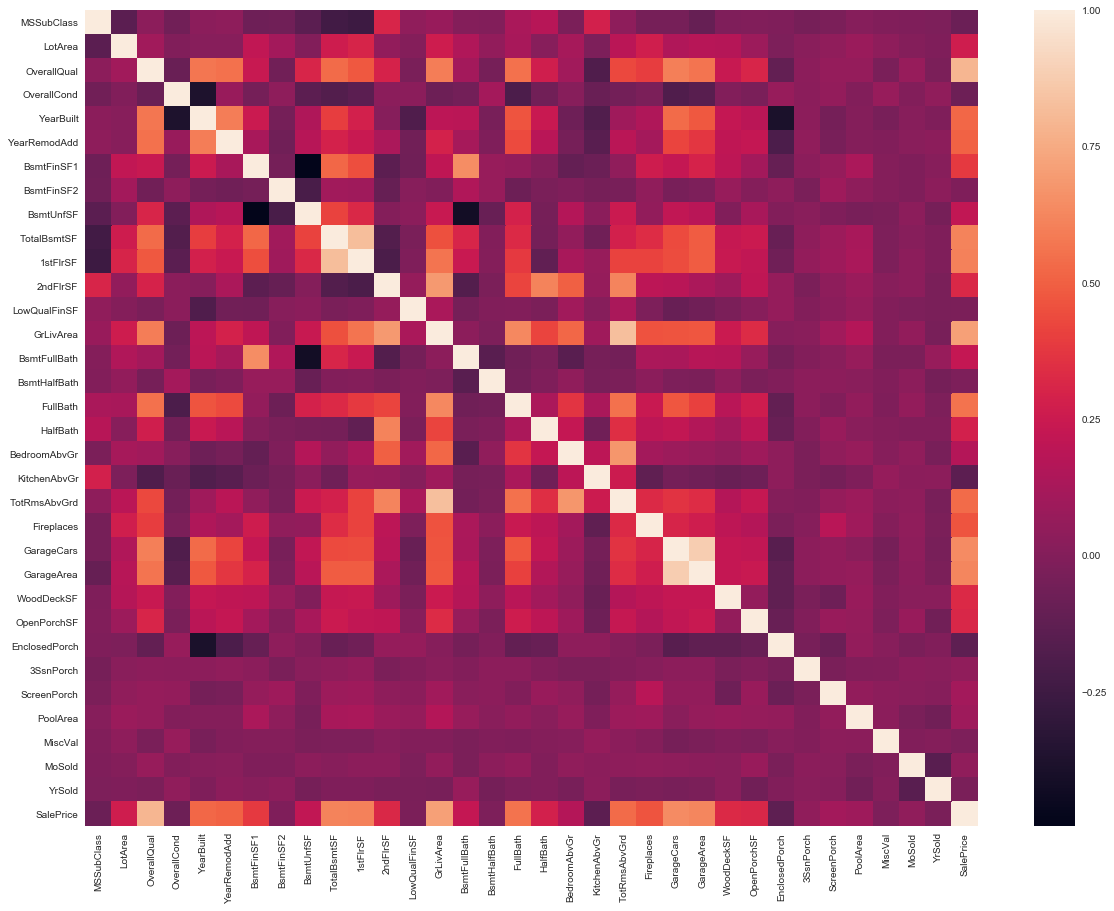

In [18]:
corrheatfig, corrheatax = plt.subplots(figsize=(20,15))
corrheatax = sns.heatmap(cleantrain.corr())

In [19]:
topcorr = cleantrain.corr().nlargest(15, 'SalePrice')['SalePrice'].index
topcorr

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF', '2ndFlrSF'],
      dtype='object')

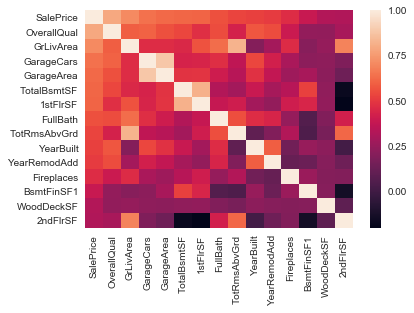

In [20]:
# sns.heatmap(pd.DataFrame(np.corrcoef(cleantrain[topcorr].values.T), columns=topcorr, index=topcorr))
sns.heatmap(np.corrcoef(cleantrain[topcorr].values.T), xticklabels=topcorr, yticklabels=topcorr)

In [21]:
cleantrain.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

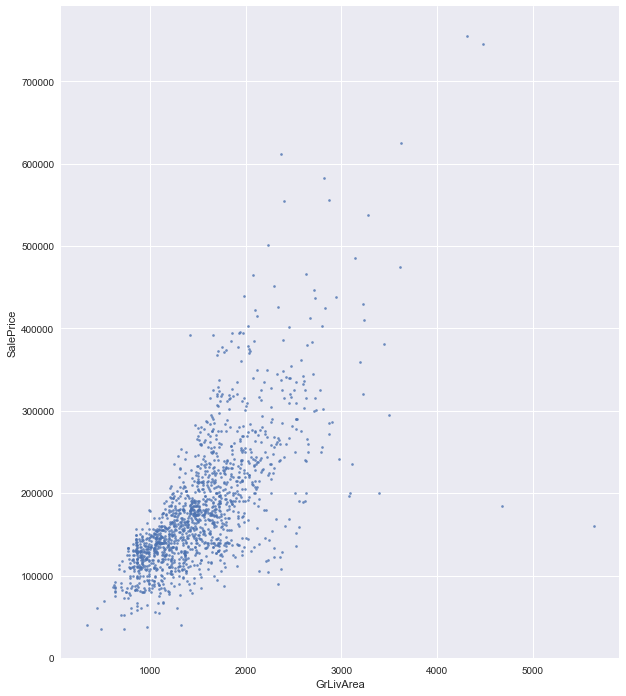

In [22]:
scatfig, scatax = plt.subplots(figsize=(10,12))
scatax = sns.regplot('GrLivArea', 'SalePrice', data = cleantrain, scatter_kws={'s':7}, fit_reg=False)

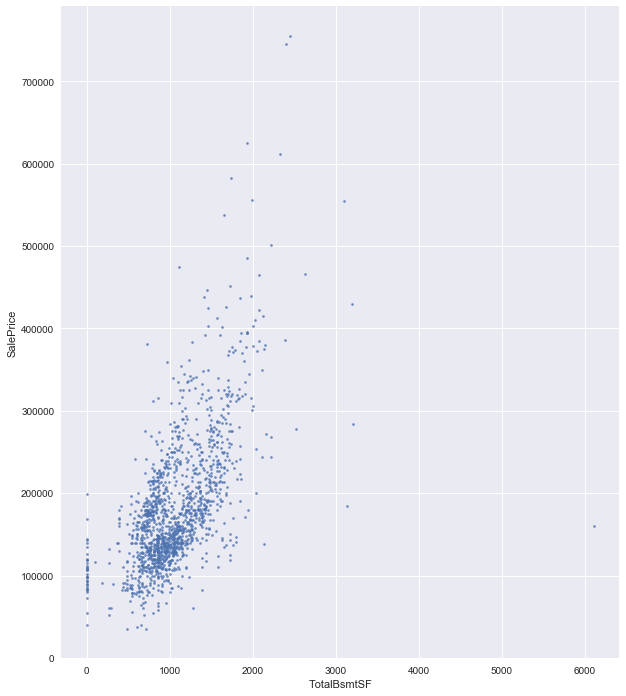

In [23]:
scatfig, scatax = plt.subplots(figsize=(10,12))
scatax = sns.regplot('TotalBsmtSF', 'SalePrice', data = cleantrain, scatter_kws={'s':7}, fit_reg=False)

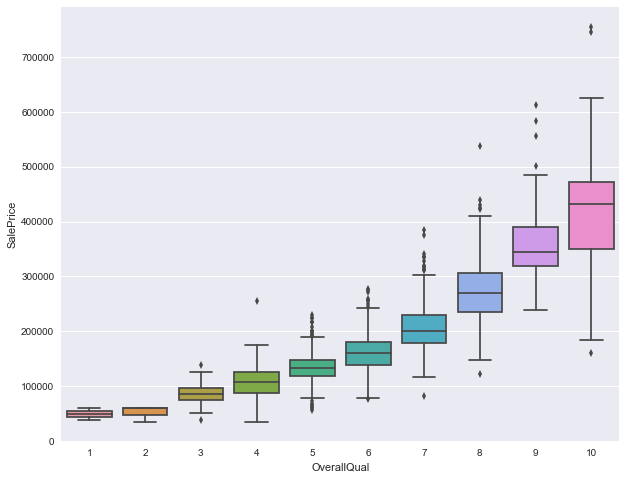

In [24]:
boxfig, boxax = plt.subplots(figsize=(10,8))
boxax = sns.boxplot('OverallQual', 'SalePrice', data=cleantrain)

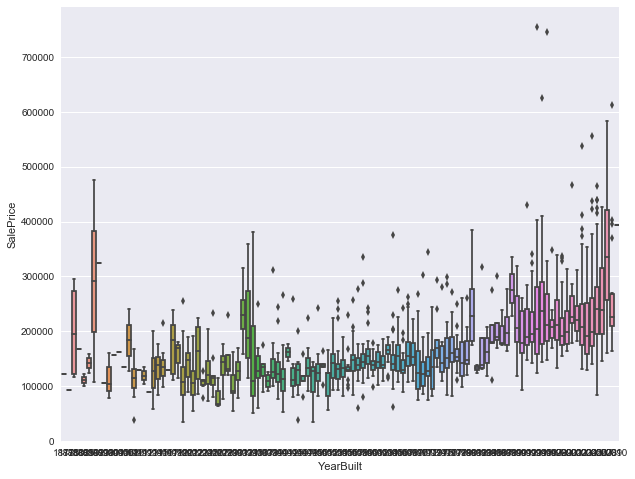

In [25]:
boxfig, boxax = plt.subplots(figsize=(10,8))
boxax = sns.boxplot('YearBuilt', 'SalePrice', data=cleantrain)

In [26]:
cleantrain.corr().nlargest(15,'SalePrice')['SalePrice']

SalePrice       1.000000
OverallQual     0.791069
GrLivArea       0.708618
GarageCars      0.640473
GarageArea      0.623423
TotalBsmtSF     0.613905
1stFlrSF        0.605968
FullBath        0.560881
TotRmsAbvGrd    0.533779
YearBuilt       0.523273
YearRemodAdd    0.507430
Fireplaces      0.466968
BsmtFinSF1      0.386436
WoodDeckSF      0.324422
2ndFlrSF        0.319464
Name: SalePrice, dtype: float64

In [27]:
selectedtrain = cleantrain.drop(['GarageArea','1stFlrSF'],axis=1)
selectedtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1460
Data columns (total 60 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non

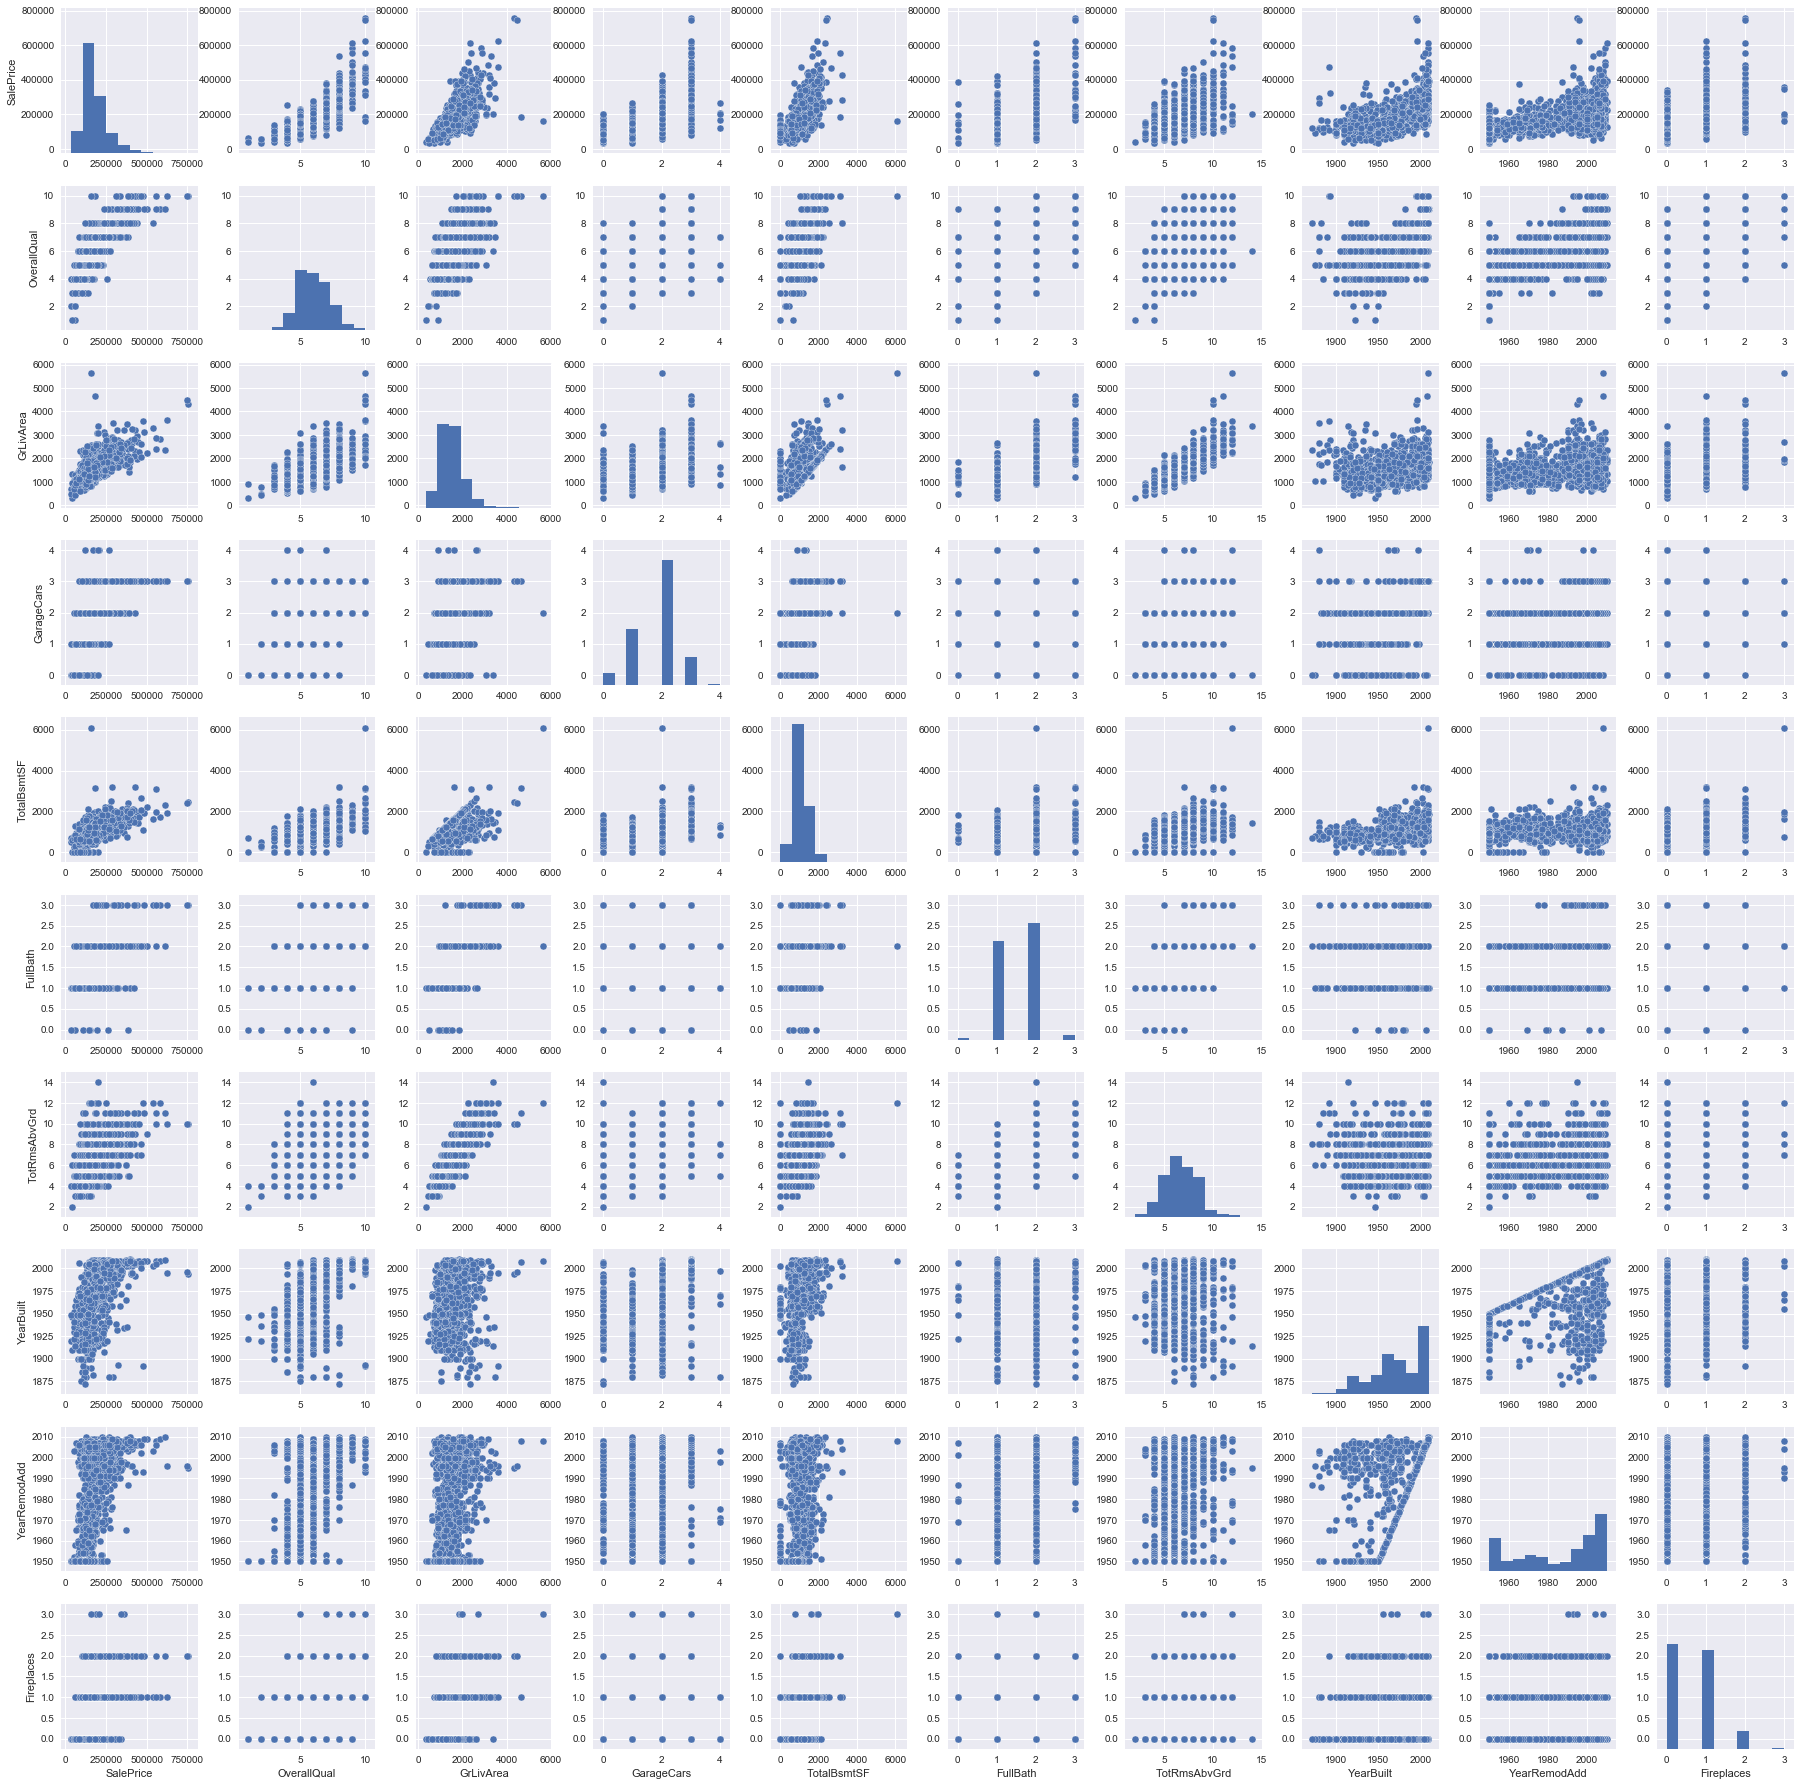

In [28]:
pairplotvars = selectedtrain.corr().nlargest(10,'SalePrice').index
sns.pairplot(selectedtrain[pairplotvars])

## Standardizing data

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
scaledtrain = scaler.fit_transform(cleantrain['SalePrice'][:,np.newaxis])

C:\Users\rjlo_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
scaledtrain[scaledtrain[:,0].argsort()][:10]

array([[-1.83820775],
       [-1.83303414],
       [-1.80044422],
       [-1.78282123],
       [-1.77400974],
       [-1.62295562],
       [-1.6166617 ],
       [-1.58519209],
       [-1.58519209],
       [-1.57269236]])

In [32]:
scaledtrain[scaledtrain[:,0].argsort()][-10:]

array([[ 3.82758058],
       [ 4.0395221 ],
       [ 4.49473628],
       [ 4.70872962],
       [ 4.728631  ],
       [ 5.06034585],
       [ 5.42191907],
       [ 5.58987866],
       [ 7.10041987],
       [ 7.22629831]])

In [33]:
import scipy.stats as stats

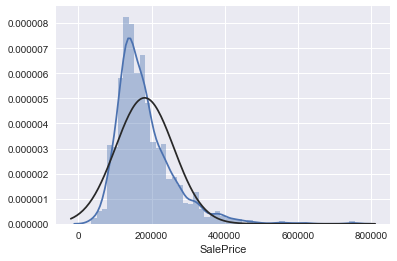

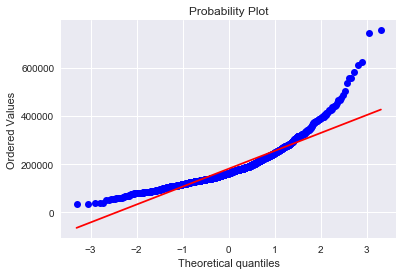

In [34]:
sns.distplot(cleantrain['SalePrice'], fit=stats.norm)
probfig, probax = plt.subplots()
probax = stats.probplot(cleantrain['SalePrice'], plot=plt)

## Regression tree clustering

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=30)

In [37]:
X_train = cleantrain.drop('SalePrice',axis=1)
y_train = cleantrain['SalePrice']

In [38]:
X_train = pd.get_dummies(X_train, drop_first=True)

In [39]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=30,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [40]:
dt.apply(X_train)

array([21,  9, 21, ..., 24,  8,  9], dtype=int64)

In [41]:
np.unique(dt.apply(X_train))

array([ 5,  6,  8,  9, 12, 13, 15, 16, 20, 21, 22, 24, 25, 30, 31, 32, 34,
       35, 37, 38], dtype=int64)

In [42]:
dt2 = DecisionTreeRegressor(max_depth=5, max_leaf_nodes=5)

In [43]:
dt2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=5, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [44]:
np.unique(dt2.apply(X_train))

array([4, 5, 6, 7, 8], dtype=int64)

In [45]:
dt2.apply(X_train)

array([4, 7, 4, ..., 4, 7, 7], dtype=int64)

In [46]:
treeclusters = pd.Series(dt2.apply(X_train), index=cleantrain.index, name='Cluster')

In [47]:
traindatawithnodes = pd.concat([cleantrain, treeclusters], axis=1)

In [48]:
traindatawithnodes.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Cluster
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,2,2008,WD,Normal,208500,4
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,5,2007,WD,Normal,181500,7
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,9,2008,WD,Normal,223500,4
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,0,2,2006,WD,Abnorml,140000,4
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,12,2008,WD,Normal,250000,5


## Plotting clusters

In [49]:
traindatawithnodes.loc[traindatawithnodes['Cluster']==4, :].head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Cluster
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,2,2008,WD,Normal,208500,4
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,9,2008,WD,Normal,223500,4
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,0,2,2006,WD,Abnorml,140000,4
8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,...,0,0,0,350,11,2009,WD,Normal,200000,4
9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,0,0,0,0,4,2008,WD,Abnorml,129900,4


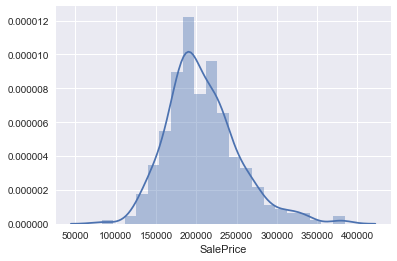

In [50]:
sns.distplot(traindatawithnodes.loc[traindatawithnodes['Cluster']==4, 'SalePrice'])

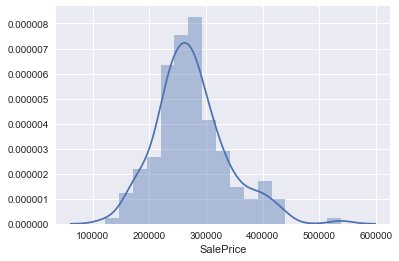

In [51]:
sns.distplot(traindatawithnodes.loc[traindatawithnodes['Cluster']==5, 'SalePrice'])

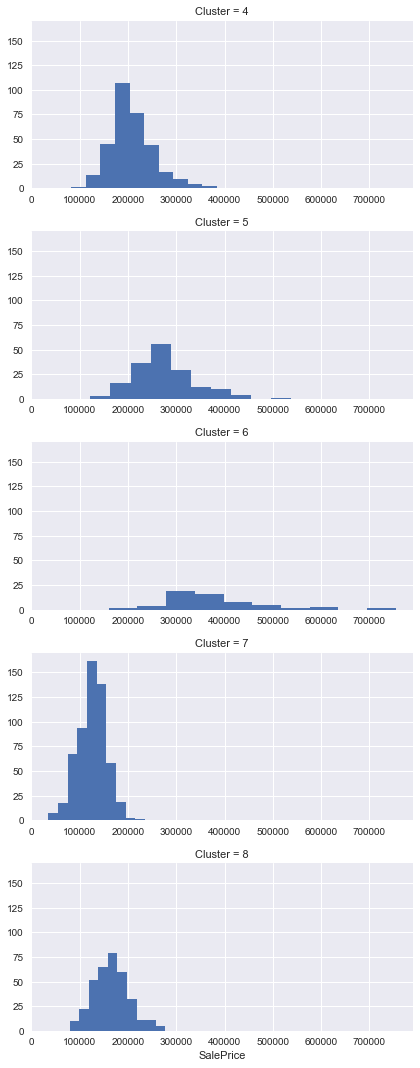

In [52]:
clusterhist = sns.FacetGrid(traindatawithnodes,row='Cluster', aspect=2)
clusterhist.map(plt.hist, 'SalePrice')

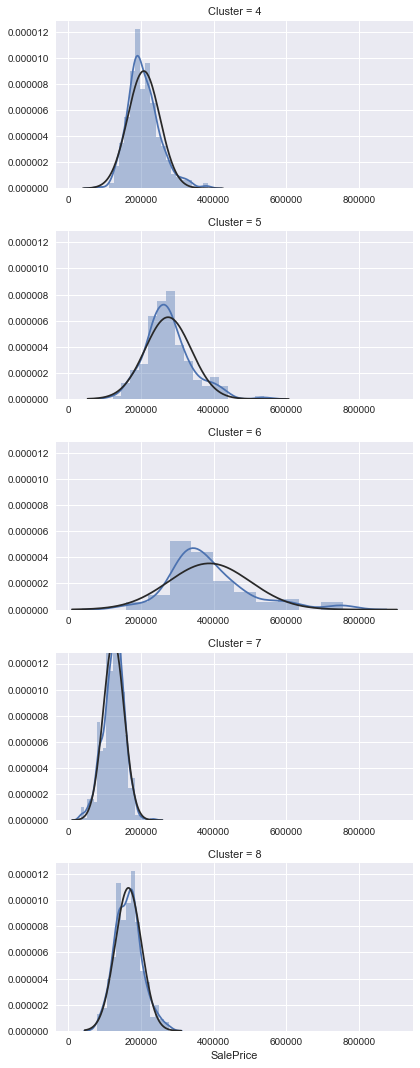

In [53]:
clusterdist = sns.FacetGrid(traindatawithnodes,row='Cluster', aspect=2)
clusterdist.map(sns.distplot, 'SalePrice', fit=stats.norm)

In [54]:
featureimportances = pd.DataFrame(list(zip(X_train.columns, dt2.feature_importances_)), columns=['Feature', 'Importance'])
featureimportances.set_index('Feature').head()

,Importance
Feature,
MSSubClass,0.00000
LotArea,0.00000
OverallQual,0.94291
OverallCond,0.00000
YearBuilt,0.00000


In [55]:
featureimportances[featureimportances['Importance'] != 0]

,Feature,Importance
2,OverallQual,0.94291
13,GrLivArea,0.05709


In [56]:
import graphviz

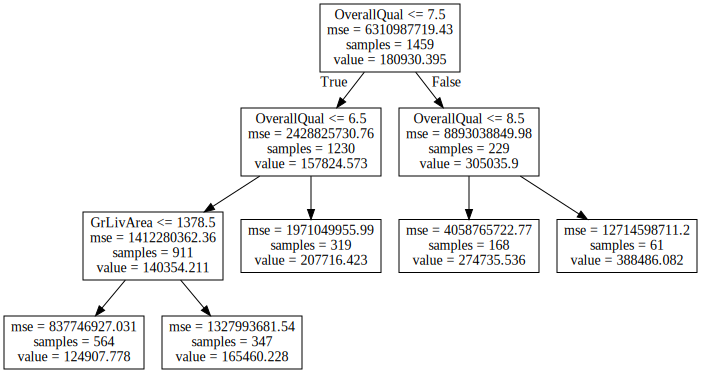

In [57]:
from sklearn.tree import export_graphviz
treeplot = export_graphviz(dt2, out_file=None, feature_names=featureimportances['Feature']) 
graph = graphviz.Source(treeplot) 
graph

In [58]:
traindatawithnodes['Cluster'].unique()

array([4, 7, 5, 6, 8], dtype=int64)

In [59]:
clusternames = [str(i) for i in traindatawithnodes['Cluster'].unique()]

In [60]:
clusternames

['4', '7', '5', '6', '8']

In [61]:
traindatawithnodes['Cluster'].value_counts()

7    564
8    347
4    319
5    168
6     61
Name: Cluster, dtype: int64